In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train1.csv')
test=pd.read_csv('test1.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
# cabin column does not add value to our data so we delete this as 70 percent are missing vales
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
 train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
train['Embarked'].fillna('S',inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [16]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

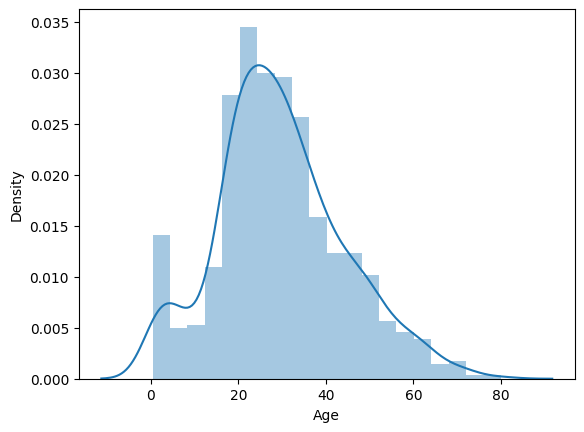

In [17]:
# now converting 
sns.distplot(train['Age'])

In [18]:
mean_age=train['Age'].mean()
std_age=train['Age'].std()

In [19]:
train_age=np.random.normal(mean_age-std_age,mean_age+std_age,177)


In [18]:
# test['Age'].fillna(test['Age'].mean(),inplace=True)
# train['Age'].fillna(train['Age'].mean(),inplace=True)

In [19]:
mean_age1=test['Age'].mean()
std_age1=test['Age'].std()

In [20]:
test_age=np.random.normal(mean_age1-std_age1,mean_age1+std_age1,86)

In [21]:
train['Age'][train['Age'].isnull()]=train_age
test['Age'][test['Age'].isnull()]=test_age

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [25]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [26]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

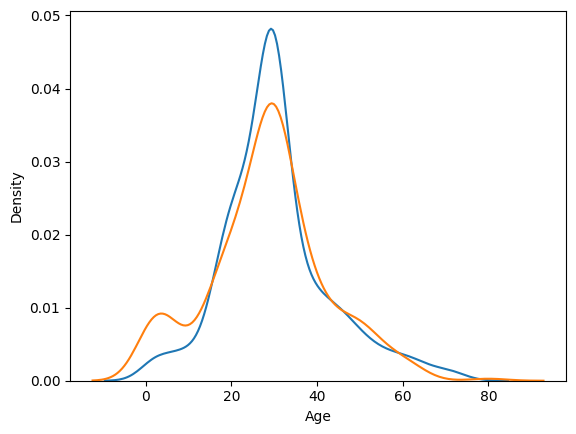

In [28]:
sns.distplot(train['Age'][train['Survived']==0],bins=100,hist=False)
sns.distplot(train['Age'][train['Survived']==1],bins=100,hist=False)

In [29]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [30]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [31]:
train['Family']=train['SibSp']+train['Parch'] +1

In [32]:
test['Family']=test['SibSp']+test['Parch'] +1

In [33]:
train['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [34]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [35]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [36]:
train['Family_size']=train['Family'].apply(cal)

In [37]:
test['Family_size']=test['Family'].apply(cal)

In [38]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [39]:
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [40]:
PassengerId=test['PassengerId'].values

In [41]:
train.drop(columns=['Name','PassengerId'],inplace=True)
#removing name  and passenger id as it is of no use

In [42]:
test.drop(columns=['Name','PassengerId'],inplace=True)

In [43]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [44]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [45]:
# now converting embarked into 3 columns
# label encoding
# we make 2 coluns and remove 1 to remove multicollinearity
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)
# we just get the data by taking 1st taking as  data set
# second as the column to apply the operation and third to remove first column

In [46]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [47]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False
3,27.0,8.6625,False,True,True,False,True,False,False
4,22.0,12.2875,False,True,False,False,True,False,True


In [48]:
train.shape

(891, 10)

In [49]:
test.shape

(418, 9)

In [50]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [53]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=classifier.predict(X_test) 

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.776536312849162

In [69]:
xf=test.iloc[:,:].values

In [70]:
y_final=classifier.predict(xf)

In [71]:
y_final.shape

(418,)

In [72]:
PassengerId.shape

(418,)

In [73]:
final=pd.DataFrame()

In [74]:
final

""


In [75]:
final['PassengerId']=PassengerId
final['Survived']=y_final

In [76]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [77]:
final.to_csv('GaddiPoPo.csv',index=False)